# Hypothesis Testing 4

In this notebook, we'll be learning Chi Square And Anova

## Chi Square Test

In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [39]:
from scipy.stats import chi2 # Distribution (cdf etc.)
from scipy.stats import chisquare # Statistical test (chistat, pvalue)
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway
from scipy.stats import ttest_ind

### Coin Example

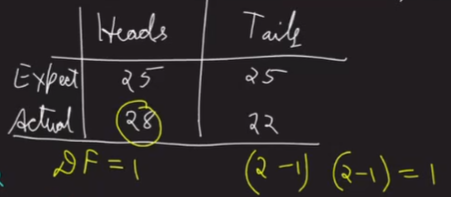

In [3]:
# H0: Coin is fair
# Ha: Coin is biased
# Test Statistic: Chi square
# Right tailed test.
(28 - 25) ** 2 / 25 + (22 - 25) ** 2 / 25 # chir2 stat 

0.72

 p-value: Here, prob. of reaching extreme values on the right side.

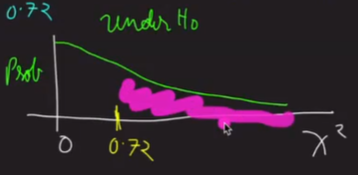

In [4]:
1 - chi2.cdf(0.72, df = 1) # p-value
# P-value is high. Fail to reject.

0.3961439091520741

If the coin is fair, p-value will be high as chi_stat will be low. Fail to reject.

If the coin is biased, p-value will be low as chi_stat will be high. Reject H0.

In [8]:
chi_stat, p_value = chisquare(

    [28, 22],
    [25, 25]
)
print(chi_stat, p_value)
if p_value < 0.05:
    print('Reject H0')
else:
    print('Failed to Reject H0')

0.72 0.3961439091520741
Failed to Reject H0


#### Critical Region

In [9]:
cr = chi2.ppf(q = 0.95, df = 1)
cr

3.841458820694124

Hence, the test-statistic has to be atleast 3.84 before we reject at the 5% significance.

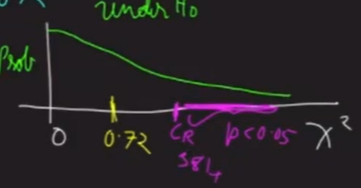

Let's check for a biased coin having high chi-stat

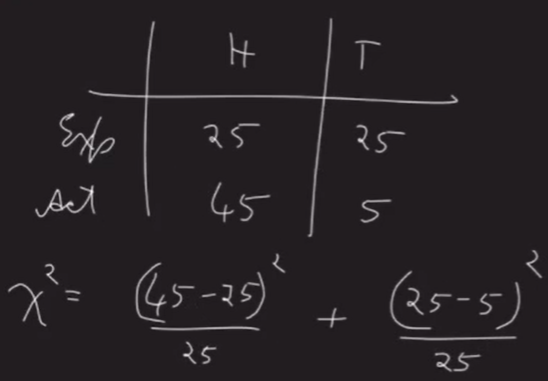

(45 - 25) ** 2 will be a high number.

In [12]:
# A coin is tossed 50 times, and 45 heads were seen
# H0: Coin is fair
# Ha: Coin is biased
chi_stat, p_value = chisquare(
    [45, 5],
    [25, 25]
)
print(chi_stat)
print(p_value)
if p_value < 0.05:
    print('Reject H0')
else:
    print('Failed to reject H0')

32.0
1.5417257900280013e-08
Reject H0


### Business Case

(Men and Women) Vs (Online and Offline)
Does gender affect preference of online vs offline

In [14]:
# H0: Gender does not affect preference of online vs offiline
# Ha: Gender does affect.

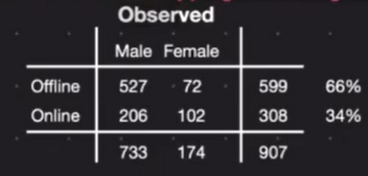

We have been given observed data. We must find expected data now.

Under H0, which states that the gender does not affect the shopping behavior.
<br>We know 66% people prefer online shopping.
<br><br>Hence, Among 733 men, 66% will prefer online shopping.
<br>66% of 733 = 484.
<br>
With this data, we can find the expect data.

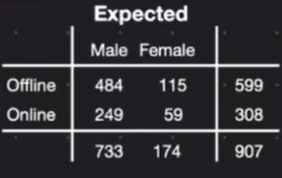

This is null under hypothesis.

In [20]:
observed = [
    [527, 72],
    [206, 102]
]

chi_stat, p_value, df, exp_freq = chi2_contingency(observed)
print(chi_stat)
print(p_value)
print(df)
print(exp_freq)
if p_value < 0.05:
    print("Reject H0")
else:
    print("Failed to reject H0")

57.04098674049609
4.268230756875865e-14
1
[[484.08710033 114.91289967]
 [248.91289967  59.08710033]]
Reject H0


#### Critical region for 95% confidence:

In [22]:
chi2.ppf(q = 0.95, df=1)

3.841458820694124

### Iphone sales

In [7]:
a = [25, 25, 27, 30, 23, 20]
b = [30, 30, 21, 24, 26, 28]
c = [18, 30, 29, 29, 24, 26]

In [8]:
# H0: These 3 datasets are similar
# Ha: They are different
# Using Anova test
f_stat, p_value = f_oneway(a,b,c)
print(f_stat, p_value)

0.2348993288590604 0.793504662732833


Hence, these 3 groups are not statistically different.

### Leading Fitness Equipment Brand

In [34]:
df = pd.read_csv('leading_fitness_equipment_brand.csv')

In [53]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,P1,18,Male,14,Single,3,4,29562,112
1,P1,19,Male,15,Single,2,3,31836,75
2,P1,19,Female,14,Partnered,4,3,30699,66
3,P1,19,Male,12,Single,3,3,32973,85
4,P1,20,Male,13,Partnered,4,2,35247,47


In [35]:
df['Product'].replace({'KP281': 'P1', 'KP481': 'P2', 'KP781': 'P3'}, inplace=True)

In [11]:
df['Product'].unique()

array(['P1', 'P2', 'P3'], dtype=object)

##### Gender Vs Product

In [51]:
gender_product = pd.crosstab(index = df['Gender'], columns = df['Product'])
gender_product

Product,P1,P2,P3
Gender,,,
Female,40,29,7
Male,40,31,33


By looking at the crosstab, we tend to believe that gender impacts product sales.
<br>We need to find out if this difference is statistically significant.

In [52]:
# H0: Gender does not affect product
# Ha: Gender affects product
chi_stat, p_value, dof, expected = chi2_contingency(gender_product)
print(chi_stat)
print(p_value)
print(dof)
print(expected)
if p_value < 0.05:
    print("Reject H0")
else:
    print("Failed to reject H0")

12.923836032388664
0.0015617972833158714
2
[[33.77777778 25.33333333 16.88888889]
 [46.22222222 34.66666667 23.11111111]]
Reject H0


##### Income Vs Product

<AxesSubplot: xlabel='Product', ylabel='Income'>

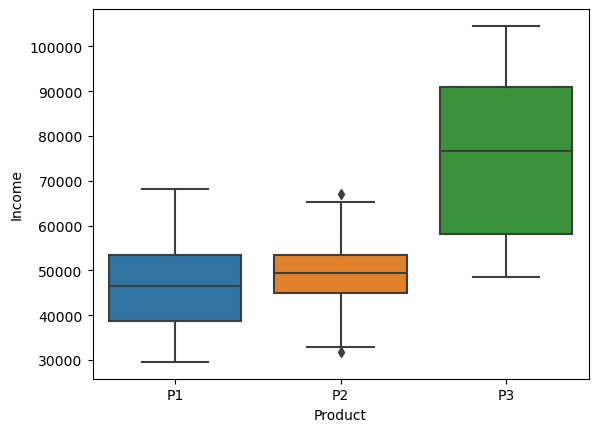

In [12]:
sns.boxplot(x = "Product", y = "Income", data = df)

Seems like only high salaried customers tend to buy P3. <br>
Is it a chance or statistically significant?

In [14]:
a = df[df['Product'] == 'P1']['Income']
b = df[df['Product'] == 'P2']['Income']
c = df[df['Product'] == 'P3']['Income']

In [16]:
# H0: These three Income groups are similar
# Ha: They are different
f_stat, p_value = f_oneway(a,b,c)
print(f_stat, p_value)

89.25903546601671 1.5644991316342494e-27


Since, p-value is low, it means that the Income groups are significantly different for each product as we observed through the boxplot.

##### Binning Income to use Chi2 Test

In [47]:
bins = [0, df['Income'].median(), df['Income'].max()]
labels = ['low', 'high']

In [48]:
df['Income_bin'] = pd.cut(df['Income'], bins, labels = labels)

In [24]:
income_bin_product = pd.crosstab(index = df['Income_bin'], columns = df['Product'])
income_bin_product

Product,P1,P2,P3
Income_bin,,,
low,50,35,5
high,30,25,35


In [26]:
# H0: income and product are independent
# Ha: They are dependent
chi_stat, p_value, dof, expected = chi2_contingency(income_bin_product)
print(chi_stat) 
print(p_value)
print(dof)
print(expected)

29.166666666666668
4.640222499769401e-07
2
[[40. 30. 20.]
 [40. 30. 20.]]


Hence, chi2 test also tells us that income and product are dependent.

##### Gender Vs Income

<AxesSubplot: xlabel='Gender', ylabel='Income'>

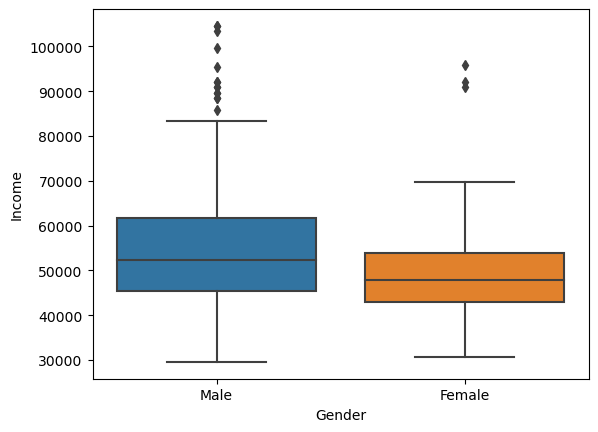

In [29]:
sns.boxplot(x = df['Gender'], y = df['Income'], data = df)

##### Let's use all three tests here:

In [36]:
male_income = df[df['Gender'] == 'Male']['Income']
female_income = df[df['Gender'] == 'Female']['Income']

In [43]:
# H0: Gender and Income are independent (equal mean)
ttest_ind(male_income,female_income)
# p-value is small

Ttest_indResult(statistic=2.752488637540257, pvalue=0.006527263097214258)

In [45]:
f_oneway(male_income,female_income)

F_onewayResult(statistic=7.576193699788215, pvalue=0.0065272630972144025)

In [49]:
gender_income = pd.crosstab(index = df['Gender'], columns = df['Income_bin'])
gender_income

Income_bin,low,high
Gender,,
Female,46,30
Male,44,60


In [52]:
chi2_contingency(gender_income)

(5.123987854251012,
 0.023597328751612016,
 1,
 array([[38., 38.],
        [52., 52.]]))

##### If you have any questions, connect with me here: https://www.linkedin.com/in/khushalkumar/